## Problem Statement :  To build a classification model to predict HypoThyroidism

In [36]:
#importing libraries
import statsmodels.tools.tools as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import statsmodels.api as sm
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,roc_auc_score,classification_report,f1_score
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.utils import resample
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
data  = pd.read_csv('hypothyroid.csv')

In [3]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


### Features
age - Age of the person

sex - Male or Female

on_thyroxine - true or false

on_antithyroid_medication - true or false

sick - true or false

pregnant - true or false

thyroid_surgery - true or false

I131_treatment - true or false

query_hypothyroid - true or false

query_hyperthyroid -true or false

lithium - true or false

goitre - true or false

tumor - true or false

hypopituitary- true or false

psych - true or false

TSH_measured - true or false

TSH - thyroid stimulating hormone floating value

T3_measured - true or false

T3 - triiodothyronine value

TT4_measured- true or false

TT4 - Thyroxine value

T4U_measured- true or false

T4U - numerical value

FTI_measured- true or false

FTI -Free Thyroxine Index

TBG_measured- true or false

TBG -Thyroid-Binding Globulin  value

referral_source - different sources of referals

Class - different types of thyroid

In [4]:
data.dtypes

age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
sick                         object
pregnant                     object
thyroid_surgery              object
I131_treatment               object
query_hypothyroid            object
query_hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                         

In [5]:
#data summary
data.describe().T

,count,unique,top,freq
age,3772,94,59,95
sex,3772,3,F,2480
on_thyroxine,3772,2,f,3308
query_on_thyroxine,3772,2,f,3722
on_antithyroid_medication,3772,2,f,3729
sick,3772,2,f,3625
pregnant,3772,2,f,3719
thyroid_surgery,3772,2,f,3719
I131_treatment,3772,2,f,3713
query_hypothyroid,3772,2,f,3538


Inference- In the the dataset the missing values are replaced with invalid values like '?'. replacing such values with 'nan' and check for missing values again.

In [6]:
data.shape

(3772, 30)

In [7]:
for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count!=0:
        print(column, data[column][data[column]=='?'].count())

age 1
sex 150
TSH 369
T3 769
TT4 231
T4U 387
FTI 385
TBG 3772


we can see thatfor column 'TBG' all the values are missing. So we will drop this column as it is of no use to us.

### Null Value Imputation

In [8]:
data = data.drop(['TBG'],axis =1)

Also, looking to the dataset, we can see that some columns are with true and false value are just the indication that whether the next column has values or not. Let's see an example:

Since, we are any ways going to handle the missing values, there is no point of having such columns in our dataset.

dropping such columns as well.

In [9]:
data = data.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis =1)

In [10]:
# replacing '?'
for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count!=0:
        data[column] = data[column].replace('?',np.nan)    

In [11]:
for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count==0:
        print(column, data[column][data[column]=='?'].count())    

age 0
sex 0
on_thyroxine 0
query_on_thyroxine 0
on_antithyroid_medication 0
sick 0
pregnant 0
thyroid_surgery 0
I131_treatment 0
query_hypothyroid 0
query_hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
referral_source 0
Class 0


In [12]:
data.isna().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
referral_source                0
Class                          0
dtype: int64

Since the values are categorical, we have to change them to numerical before we use any imputation techniques.

We can use get dummies but since most of the columns have only two distinct categories we will use mapping for them. Why? Because since there are only two categories then the two columns formed after get dummies will both have very high correaltion since they both explain the same thing. So in anyway we will have to drop one of the columns. That's why let's use mapping for such columns.
For columns with more than two categories we will use get dummies.

In [13]:
# mapping sex with 0 and 1
data['sex'] = data['sex'].map({'F' : 0, 'M' : 1})

In [14]:
#for true or false columns
for column in data.columns:
    if  len(data[column].unique())==2:
        data[column] = data[column].map({'f' : 0, 't' : 1})
        

In [15]:
# using get_dummies.
data = pd.get_dummies(data, columns=['referral_source'])

In [16]:
data['Class'].value_counts()

negative                   3481
compensated_hypothyroid     194
primary_hypothyroid          95
secondary_hypothyroid         2
Name: Class, dtype: int64

In [17]:
LE = LabelEncoder()

data['Class'] =LE.fit_transform(data['Class'])

In [18]:
data['Class'].value_counts()

1    3481
0     194
2      95
3       2
Name: Class, dtype: int64

### Note-

1- negativve

0 - compensared hypothyroidism

2- primary hypothyroidsm

3- secondary hypothyroidim

In [19]:
#summary of all
data.describe(include='object')

,age,TSH,T3,TT4,T4U,FTI
count,3771,3403,3003,3541,3385,3387
unique,93,287,69,241,146,234
top,59,0.2,2,101,0.99,100
freq,95,116,238,71,95,73


### imputing the missing values using KNNimputer

In [20]:
imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(data) # impute the missing values
    # convert the nd-array returned in the step above to a Dataframe
new_data=pd.DataFrame(data=np.round(new_array), columns=data.columns)

In [21]:
new_data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,...,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,51.737275,0.307529,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,...,2.027306,108.459438,1.020944,110.301166,0.974814,0.029692,0.102333,0.010339,0.274125,0.583510
std,20.082478,0.461532,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,...,0.785068,34.838114,0.165546,32.145618,0.279508,0.169760,0.303126,0.101169,0.446131,0.493042
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,88.000000,1.000000,93.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,104.000000,1.000000,107.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,124.000000,1.000000,124.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,11.000000,430.000000,2.000000,395.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
#checking for null values
new_data.isnull().sum()/len(new_data)*100

age                          0.0
sex                          0.0
on_thyroxine                 0.0
query_on_thyroxine           0.0
on_antithyroid_medication    0.0
sick                         0.0
pregnant                     0.0
thyroid_surgery              0.0
I131_treatment               0.0
query_hypothyroid            0.0
query_hyperthyroid           0.0
lithium                      0.0
goitre                       0.0
tumor                        0.0
hypopituitary                0.0
psych                        0.0
TSH                          0.0
T3                           0.0
TT4                          0.0
T4U                          0.0
FTI                          0.0
Class                        0.0
referral_source_STMW         0.0
referral_source_SVHC         0.0
referral_source_SVHD         0.0
referral_source_SVI          0.0
referral_source_other        0.0
dtype: float64

Inference- no missing values in our new dataset. 

### the distribution for our continous data in the dataset

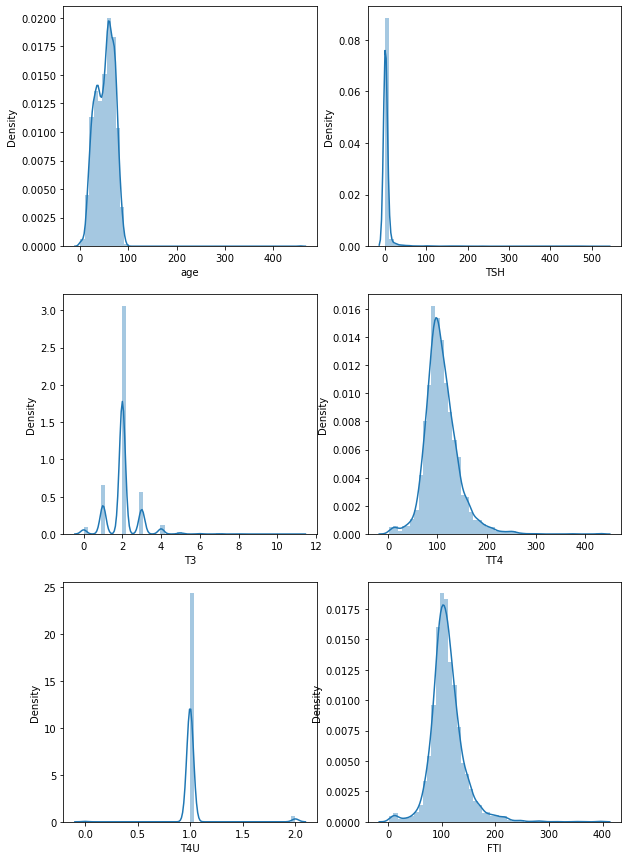

In [23]:
columns = ['age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(10,15),facecolor='white')
pltnumber = 1

for column in columns:
    ax = plt.subplot(3,2,pltnumber)
    sns.distplot(new_data[column])
    plt.xlabel(column,fontsize=10)
    pltnumber+=1
plt.show()

The graphs for age, TSH and T3 looks heavely skewed towards left. Let's do some transformations to the data and see if it improves the plot.

Before doing log transformation , let's add 1 to each valuue in the column to handle exception when we try to find log of '0'.

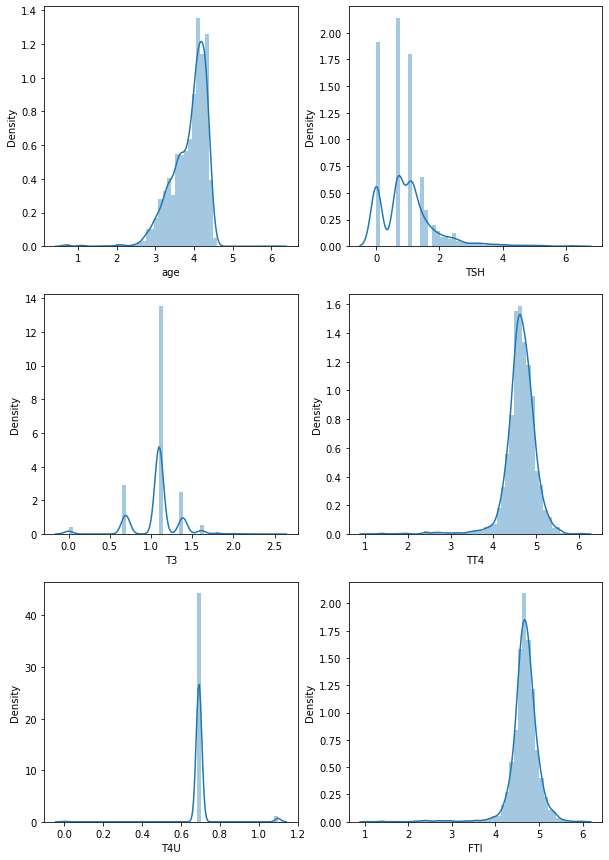

In [24]:
columns = ['age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    new_data[column]+=1
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(np.log(new_data[column]))
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

After log transformation, rest of the columns look fine but 'TSH' has a weird trend.

It won't give much of information so let's drop this column.

In [25]:
new_data = new_data.drop(['TSH'],axis=1)


#### let's see how balanced our dataset in terms of given target classes:

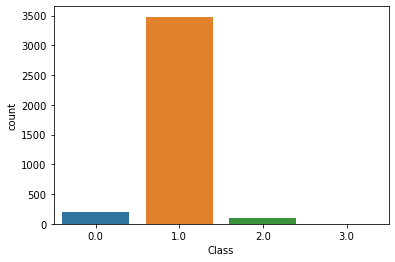

In [26]:
sns.countplot(new_data['Class'])
plt.show()

We can clerly see that the dataset is imbalanced. 

hence we appply smote

In [27]:
x = new_data.drop(['Class'],axis=1)
y = new_data['Class']
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_resample(x,y)

In [28]:
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_resample(x,y)

In [29]:
x_sampled.shape

(13924, 25)

In [30]:
x_sampled = pd.DataFrame(data = x_sampled, columns = x.columns)

In [31]:
x_sampled

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,psych,T3,TT4,T4U,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,126.0,2.0,110.0,0.0,1.0,0.0,0.0,0.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,103.0,2.0,109.0,0.0,0.0,0.0,0.0,1.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,110.0,2.0,121.0,0.0,0.0,0.0,0.0,1.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,176.0,2.0,178.0,0.0,0.0,0.0,0.0,1.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,62.0,2.0,71.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13919,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0
13920,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0
13921,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,23.0,2.0,58.0,0.0,0.0,0.0,0.0,1.0
13922,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,49.0,2.0,55.0,0.0,0.0,0.0,0.0,1.0


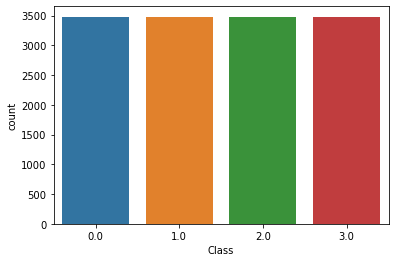

In [32]:
sns.countplot(y_sampled)
plt.show()

### Inference- dataset looks balanced now

In [33]:
x_sampled.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,psych,T3,TT4,T4U,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,126.0,2.0,110.0,0.0,1.0,0.0,0.0,0.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,103.0,2.0,109.0,0.0,0.0,0.0,0.0,1.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,110.0,2.0,121.0,0.0,0.0,0.0,0.0,1.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,176.0,2.0,178.0,0.0,0.0,0.0,0.0,1.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,62.0,2.0,71.0,0.0,0.0,0.0,1.0,0.0


In [34]:
y_sampled.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Class, dtype: float64

In [38]:
# splitting into test and train

X_train, X_test, y_train, y_test = train_test_split(x_sampled,y_sampled,test_size = .3 ,random_state=10)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9746, 25)
(4178, 25)
(9746,)
(4178,)


### Applying Logistic Regression

In [41]:
logreg=LogisticRegression(random_state=10)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [43]:
#getting train scores
print('Train results \n')
y_train_predict = logreg.predict(X_train)
model_score = logreg.score(X_train, y_train)
print(model_score)
print("\n")
print(confusion_matrix(y_train, y_train_predict))
print("/n/n",classification_report(y_train, y_train_predict))

Train results 

0.7808331623230043


[[1393  787  134  132]
 [ 656 1727   38   32]
 [ 199   72 2054   86]
 [   0    0    0 2436]]
/n/n               precision    recall  f1-score   support

         0.0       0.62      0.57      0.59      2446
         1.0       0.67      0.70      0.69      2453
         2.0       0.92      0.85      0.89      2411
         3.0       0.91      1.00      0.95      2436

    accuracy                           0.78      9746
   macro avg       0.78      0.78      0.78      9746
weighted avg       0.78      0.78      0.78      9746



In [44]:
#getting test scores
print('\nTest results \n')
y_test_predict = logreg.predict(X_test)
model_score = logreg.score(X_test, y_test)
print(model_score)
print("\n")
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))


Test results 

0.7865007180469124


[[ 602  340   40   53]
 [ 273  716   21   18]
 [  64   32  923   51]
 [   0    0    0 1045]]
              precision    recall  f1-score   support

         0.0       0.64      0.58      0.61      1035
         1.0       0.66      0.70      0.68      1028
         2.0       0.94      0.86      0.90      1070
         3.0       0.90      1.00      0.94      1045

    accuracy                           0.79      4178
   macro avg       0.78      0.79      0.78      4178
weighted avg       0.78      0.79      0.78      4178



### SVM Model

In [45]:
from sklearn import svm

SVM_model= svm.SVC(random_state=1)
SVM_model.fit(X_train, y_train)

SVC(random_state=1)

In [46]:
## Performance Matrix on train data set
y_train_predict = SVM_model.predict(X_train)
model_score = SVM_model.score(X_train, y_train)
print(model_score)
print("\n")
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.8044325877282988


[[1748  661   37    0]
 [ 862 1567   19    5]
 [  71   45 2089  206]
 [   0    0    0 2436]]
              precision    recall  f1-score   support

         0.0       0.65      0.71      0.68      2446
         1.0       0.69      0.64      0.66      2453
         2.0       0.97      0.87      0.92      2411
         3.0       0.92      1.00      0.96      2436

    accuracy                           0.80      9746
   macro avg       0.81      0.80      0.81      9746
weighted avg       0.81      0.80      0.80      9746



In [47]:
## Performance Matrix on test data set
y_test_predict = SVM_model.predict(X_test)
model_score = SVM_model.score(X_test, y_test)
print(model_score)
print("\n")
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.7946385830540929


[[ 718  294   23    0]
 [ 373  640   11    4]
 [  34   20  917   99]
 [   0    0    0 1045]]
              precision    recall  f1-score   support

         0.0       0.64      0.69      0.66      1035
         1.0       0.67      0.62      0.65      1028
         2.0       0.96      0.86      0.91      1070
         3.0       0.91      1.00      0.95      1045

    accuracy                           0.79      4178
   macro avg       0.80      0.79      0.79      4178
weighted avg       0.80      0.79      0.79      4178



### KNN classifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train,y_train)

KNeighborsClassifier()

In [57]:
KNN_SM_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [49]:
#train
y_train_predict = KNN_SM_model.predict(X_train)
model_score = KNN_SM_model.score(X_train, y_train)
print(model_score)
print("\n")
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.9668581982351734


[[2446    0    0    0]
 [ 303 2130   19    1]
 [   0    0 2411    0]
 [   0    0    0 2436]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      2446
         1.0       1.00      0.87      0.93      2453
         2.0       0.99      1.00      1.00      2411
         3.0       1.00      1.00      1.00      2436

    accuracy                           0.97      9746
   macro avg       0.97      0.97      0.97      9746
weighted avg       0.97      0.97      0.97      9746



In [50]:
#test
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print("\n")
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.9511728099569172


[[1035    0    0    0]
 [ 190  824   14    0]
 [   0    0 1070    0]
 [   0    0    0 1045]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.92      1035
         1.0       1.00      0.80      0.89      1028
         2.0       0.99      1.00      0.99      1070
         3.0       1.00      1.00      1.00      1045

    accuracy                           0.95      4178
   macro avg       0.96      0.95      0.95      4178
weighted avg       0.96      0.95      0.95      4178



### Random forest

In [52]:
from sklearn.ensemble import RandomForestClassifier


rf_model= RandomForestClassifier(random_state=12,max_depth=8)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=12)

In [53]:
# Performance on train data set
y_train_predict = rf_model.predict(X_train)
model_score = rf_model.score(X_train, y_train)
print(model_score)
print("\n")
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.9064231479581367


[[2124  322    0    0]
 [ 552 1886   15    0]
 [   0   23 2388    0]
 [   0    0    0 2436]]
              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83      2446
         1.0       0.85      0.77      0.81      2453
         2.0       0.99      0.99      0.99      2411
         3.0       1.00      1.00      1.00      2436

    accuracy                           0.91      9746
   macro avg       0.91      0.91      0.91      9746
weighted avg       0.91      0.91      0.91      9746



In [54]:
#performance on test data
y_test_predict = rf_model.predict(X_test)
model_score = rf_model.score(X_test, y_test)
print(model_score)
print("\n")
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.8992340832934418


[[ 892  143    0    0]
 [ 255  759   14    0]
 [   0    9 1061    0]
 [   0    0    0 1045]]
              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82      1035
         1.0       0.83      0.74      0.78      1028
         2.0       0.99      0.99      0.99      1070
         3.0       1.00      1.00      1.00      1045

    accuracy                           0.90      4178
   macro avg       0.90      0.90      0.90      4178
weighted avg       0.90      0.90      0.90      4178



### Inference - KNN gives us the best results in both test and train now making it better by hyperparamter tuning

In [62]:
# from sklearn.model_selection import GridSearchCV


# param=[{'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#  'leaf_size': [15,20,30,35,40],
#  'n_neighbors': [2,3,4,5,6,7],
#  'weights': ['uniform', 'distance']}]
# KNN_model=KNeighborsClassifier()
# knn_grid = GridSearchCV(estimator= KNN_model,
#                         param_grid = param,cv=5)
# knn_grid.fit(X_train,y_train)

### Note-  after grid search

Best parameters for Decision Tree Classifier: {'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 2, 'weights': 'distance'}

In [70]:
tuned_KNN_model=KNeighborsClassifier(algorithm= 'auto',leaf_size= 12,n_neighbors= 2)
tuned_KNN_model.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=12, n_neighbors=2)

In [71]:
#train
y_train_predict = tuned_KNN_model.predict(X_train)
model_score = tuned_KNN_model.score(X_train, y_train)
print(model_score)
print("\n")
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

0.9826595526369792


[[2446    0    0    0]
 [ 169 2284    0    0]
 [   0    0 2411    0]
 [   0    0    0 2436]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      2446
         1.0       1.00      0.93      0.96      2453
         2.0       1.00      1.00      1.00      2411
         3.0       1.00      1.00      1.00      2436

    accuracy                           0.98      9746
   macro avg       0.98      0.98      0.98      9746
weighted avg       0.98      0.98      0.98      9746



In [72]:
#test
y_test_predict = tuned_KNN_model.predict(X_test)
model_score = tuned_KNN_model.score(X_test, y_test)
print(model_score)
print("\n")
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

0.9607467687888942


[[1035    0    0    0]
 [ 152  864   12    0]
 [   0    0 1070    0]
 [   0    0    0 1045]]
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      1035
         1.0       1.00      0.84      0.91      1028
         2.0       0.99      1.00      0.99      1070
         3.0       1.00      1.00      1.00      1045

    accuracy                           0.96      4178
   macro avg       0.97      0.96      0.96      4178
weighted avg       0.97      0.96      0.96      4178



### Cross Validation

In [76]:
#train data
from sklearn.model_selection import cross_val_score
scores_train = cross_val_score(tuned_KNN_model, X_train, y_train_predict, cv=10)
scores_train

array([0.97128205, 0.97641026, 0.96512821, 0.97641026, 0.97128205,
       0.96307692, 0.97638604, 0.9650924 , 0.96714579, 0.97227926])

In [77]:
print("the average train accuracy of the model is :  ",scores_train.mean())

the average train accuracy of the model is :   0.9704493234349496


In [78]:
#for test
scores_test = cross_val_score(tuned_KNN_model, X_test, y_test_predict, cv=10)
scores_test

array([0.94497608, 0.94019139, 0.92822967, 0.94976077, 0.94736842,
       0.94497608, 0.92822967, 0.94258373, 0.94004796, 0.94724221])

In [79]:
print("the average test accuracy of the model is :  ",scores_test.mean())

the average test accuracy of the model is :   0.9413605957339393


### Model Prediction

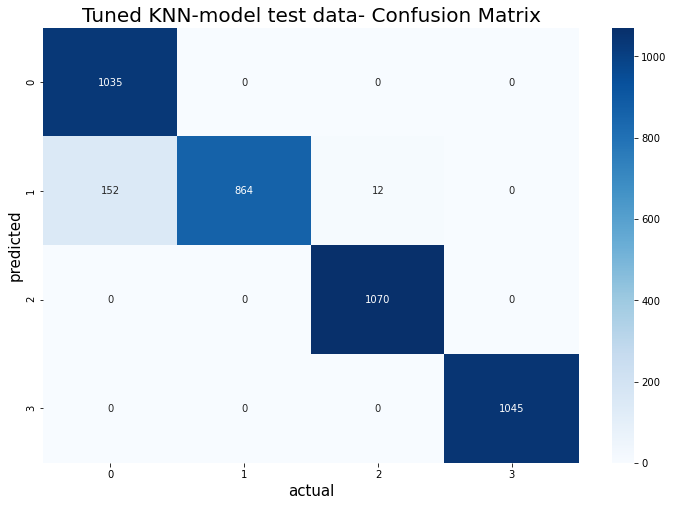

In [86]:
#test data info
cm=confusion_matrix(y_test,y_test_predict)
plt.figure(figsize=((12,8)))
sns.heatmap(cm,annot=True,cmap='Blues',fmt='.0f')
plt.title("Tuned KNN-model test data- Confusion Matrix",fontsize=20)
plt.xlabel("actual",fontsize=15)
plt.ylabel("predicted",fontsize=15)
plt.show()